Following the **Mean global DNA methylation serves as independent prognostic marker in IDH-wildtype glioblastoma** paper 

In [23]:
import pandas as pd
import numpy as np

wd = "C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data"

1. Import the methylaiton and response data

2. Preprocess the data dn match methylation with response

fill the NaN values with np.nan (instead of zeros like it was done in preprocess.py)


In [25]:
df = pd.read_csv(f"{wd}/Cleveland/CCLE_RRBS_TSS1kb_20181022.txt", sep="\t").dropna()
df["locus_id"] = df["locus_id"].apply(lambda x : x.split("_")[0])
df = df.drop(df.columns[1:3], axis=1)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x : pd.to_numeric(x, errors="coerce")).fillna(np.nan)
df = df.groupby("locus_id").mean().T
df.index = [x.split("_")[0] for x in df.index]
df = df.loc[~df.index.duplicated(keep="first")]
df.head()

C:\Users\mmarc\AppData\Local\Temp\ipykernel_11520\390859071.py:1: DtypeWarning: Columns (2,618) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{wd}/Cleveland/CCLE_RRBS_TSS1kb_20181022.txt", sep="\t").dropna()


locus_id,A1BG,A1BG-AS1,A2M-AS1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADAT,AAGAB,...,ZSWIM9,ZUP1,ZWILCH,ZWINT,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
DMS53,0.51504,0.59476,0.00442,NaN,0.0,0.0921,0.0,0.129,0.004027,0.0,...,0.0,0.16253,0.0,0.0,0.0,0.0,0.0229,0.00203,0.0101,0.0
SW1116,0.5,0.4444,0.00645,0.16665,0.01401,0.0,0.0,1.0,0.009673,0.0,...,0.0,0.26139,0.0,0.0,0.0,0.5294,0.0,0.0,0.0,0.0
P3HR1,0.98288,0.96342,0.95503,NaN,0.00806,0.005,0.02762,0.36497,0.949727,0.02055,...,0.05401,0.22041,0.0225,0.0,0.09392,0.83335,0.01404,0.07789,0.03783,0.01905
HUT78,1.0,1.0,0.92654,NaN,0.22223,0.0,0.03727,0.0,0.45588,0.025805,...,0.0,0.30263,0.0,0.0,0.07543,0.0,0.00548,0.00331,0.10369,0.0
UMUC3,0.55295,0.77274,0.53876,NaN,0.00504,0.0,0.01565,0.0741,0.104427,0.000605,...,0.00055,0.12587,0.0,0.0082,0.02688,0.01725,0.0,0.00101,0.04651,0.00379


In [ ]:
# OPTIONAL
## Second version: fill the 0.0 with NaN
df = df.replace(0, np.nan)

C:\Users\mmarc\AppData\Local\Temp\ipykernel_11520\974147871.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(0, np.nan)


In [51]:
n_nan_rows = df.isna().any(axis=1).sum()
n_nan_cols = df.isna().any(axis=0).sum()
print(f"Rows with NaNs: {n_nan_rows}")
print(f"Columns with NaNs: {n_nan_cols}")

non_numeric_cols = df.columns[~df.apply(pd.api.types.is_numeric_dtype)]
print("Non-numeric columns:", list(non_numeric_cols))

# Show columns with more than 30% missing values
threshold = 0.3
many_nan_cols = df.columns[df.isna().mean() > threshold]
print("Columns with >30% NaNs:", list(many_nan_cols))

many_nan_rows = df.index[df.isna().mean(axis=1) > threshold]
print(f"Rows with >{int(threshold * 100)}% NaNs:", list(many_nan_rows))

Rows with NaNs: 451
Columns with NaNs: 17182
Non-numeric columns: ['mean_methylation']
Columns with >30% NaNs: ['A3GALT2', 'AAAS', 'AACS', 'AAMDC', 'AAR2', 'AARS', 'AARS2', 'AASDH', 'ABCA2', 'ABCA7', 'ABCB1', 'ABCB10', 'ABCB7', 'ABCB8', 'ABCB9', 'ABCC4', 'ABCC5', 'ABCC5-AS1', 'ABCD1', 'ABCD2', 'ABCD3', 'ABCE1', 'ABCF1', 'ABCF2', 'ABHD12', 'ABHD13', 'ABHD16A', 'ABHD17B', 'ABHD18', 'ABHD3', 'ABHD4', 'ABHD5', 'ABHD6', 'ABI1', 'ABI2', 'ABL2', 'ABRAXAS1', 'ABTB2', 'ACAA2', 'ACAD10', 'ACAD8', 'ACAD9', 'ACADM', 'ACAP2', 'ACAT1', 'ACBD3', 'ACBD4', 'ACBD7-DCLRE1CP1', 'ACCS', 'ACER3', 'ACIN1', 'ACLY', 'ACO1', 'ACO2', 'ACOT1', 'ACOT13', 'ACOT8', 'ACOT9', 'ACP2', 'ACP6', 'ACSBG2', 'ACSL3', 'ACSL4', 'ACSS2', 'ACTB', 'ACTBL2', 'ACTL6A', 'ACTN1-AS1', 'ACTR10', 'ACTR1B', 'ACTR2', 'ACTR3', 'ACTR3-AS1', 'ACTR5', 'ACTR8', 'ACVR2A', 'ACY1', 'ADAM10', 'ADAM17', 'ADAM19', 'ADAM3A', 'ADAM6', 'ADAMTS17', 'ADAMTSL4', 'ADARB2-AS1', 'ADAT1', 'ADAT2', 'ADCY6', 'ADCY7', 'ADD1', 'ADD3-AS1', 'ADGRA3', 'ADGRB3', 'ADG

In [ ]:
labels = pd.read_csv('C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/cleveland_auc_only.csv')

In [52]:
# match by common cell line name
meth_cell_lines = df.index
labels_cell_lines = labels['id'].values
common_cell_lines = [m for m in meth_cell_lines if m in labels_cell_lines]

y = labels.set_index('id').loc[common_cell_lines].reset_index()
df = df.loc[common_cell_lines]

print(y)
print(df)

         id       auc
0     DMS53  3.872756
1    SW1116  3.975980
2     UMUC3  2.117008
3       HOS  1.800787
4    SNU449  2.900534
..      ...       ...
446    UO31  1.422632
447   SF268  2.327168
448   SF539  2.760685
449   SNB75  3.533992
450   HOP92  3.352980

[451 rows x 2 columns]
locus_id     A1BG  A1BG-AS1  A2M-AS1  A3GALT2   A4GALT    AAAS     AACS  \
DMS53     0.51504   0.59476  0.00442      NaN      NaN  0.0921      NaN   
SW1116    0.50000   0.44440  0.00645  0.16665  0.01401     NaN      NaN   
UMUC3     0.55295   0.77274  0.53876      NaN  0.00504     NaN  0.01565   
HOS       0.87010   0.88889  0.07932      NaN      NaN     NaN  0.01852   
SNU449    0.42615   0.76471  0.02522  1.00000  0.04541     NaN      NaN   
...           ...       ...      ...      ...      ...     ...      ...   
UO31          NaN       NaN      NaN      NaN      NaN     NaN      NaN   
SF268     0.50000   1.00000  0.43630  1.00000  0.74930     NaN      NaN   
SF539     0.89135   1.00000  0.00985 

3. Calculate the mean methyaltion per sample

In [53]:
mean_methylation = df.mean(axis=1, skipna=True)
df['mean_methylation'] = mean_methylation

median_methylation = df.median(axis=1, skipna=True)
df['median_methylation'] = median_methylation

4. Statistical Analysis

5. Divide the samples into resistant and not resistand based on median cutoff value
*"Next, we stratified the cohort into long and short surviving
patients based on the median OS of 15.8 months"*

In [54]:
median = y['auc'].median(axis=0)
print(f"Median cutoff vlaue {median}")

y['class'] = (y['auc'] >= median).astype(int)
y.head()
print(f"We have {y['class'].sum()} class '1: resistant' out of {len(y)} all")

Median cutoff vlaue 2.68097035069631
We have 226 class '1: resistant' out of 451 all


In [55]:
print(f"Median methylation value is: {df['mean_methylation'].median()}")

Median methylation value is: 0.28892674783871497


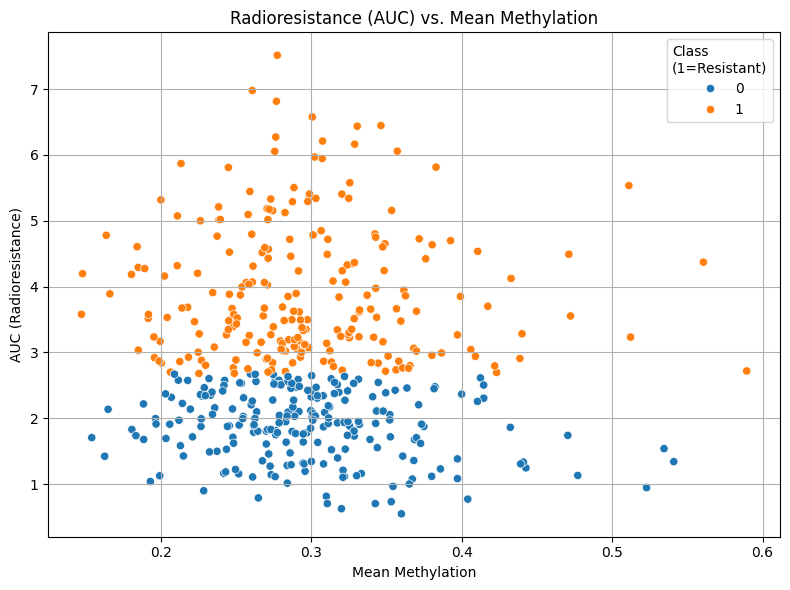

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# First ensure 'id' is set as index in y
y_indexed = y.set_index('id')

# Join on index
plot_df = df[['mean_methylation']].join(y_indexed[['auc', 'class']])

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_df, x='mean_methylation', y='auc',  hue='class')
plt.title("Radioresistance (AUC) vs. Mean Methylation")
plt.xlabel("Mean Methylation")
plt.ylabel("AUC (Radioresistance)")
plt.legend(title="Class\n(1=Resistant)")
plt.grid(True)
plt.tight_layout()
plt.show()


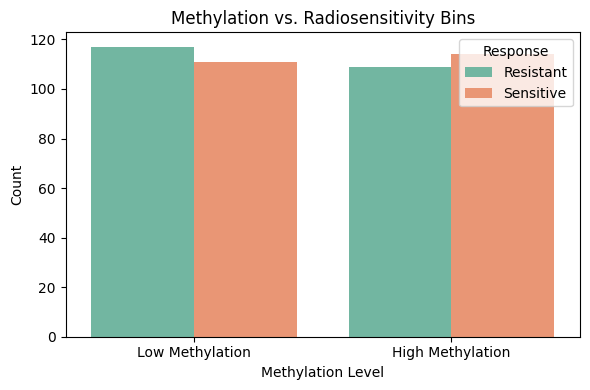

In [57]:
# Create categorical bins
meth_median = plot_df['mean_methylation'].median()
auc_median = plot_df['auc'].median()

plot_df['methylation_bin'] = (plot_df['mean_methylation'] >= meth_median).map({True: 'High Methylation', False: 'Low Methylation'})
plot_df['auc_bin'] = (plot_df['auc'] >= auc_median).map({True: 'Resistant', False: 'Sensitive'})

plt.figure(figsize=(6, 4))
sns.countplot(data=plot_df, x='methylation_bin', hue='auc_bin', palette='Set2')
plt.title("Methylation vs. Radiosensitivity Bins")
plt.xlabel("Methylation Level")
plt.ylabel("Count")
plt.legend(title="Response")
plt.tight_layout()
plt.show()


## Figure 1:

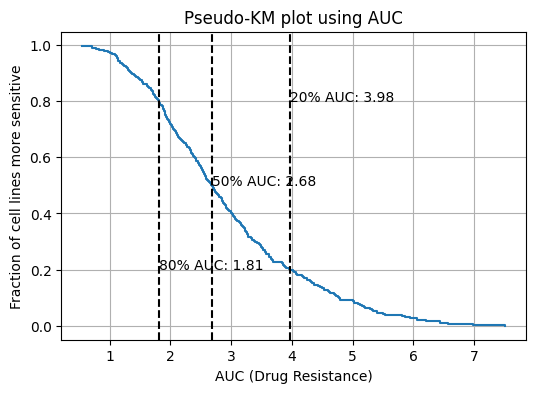

In [67]:
import numpy as np
import matplotlib.pyplot as plt

auc = np.array(y['auc'].values.ravel())  # replace with your actual AUC array
auc_sorted = np.sort(auc)
n = len(auc_sorted)

surv_prob = 1 - np.arange(1, n + 1) / n


plt.figure(figsize=(6, 4))
plt.step(auc_sorted, surv_prob, where="post", label="AUC survival-like curve")
plt.xlabel("AUC (Drug Resistance)")
plt.ylabel("Fraction of cell lines more sensitive")
plt.title("Pseudo-KM plot using AUC")
plt.grid(True)


def label_auc_threshold(threshold, label):
    idx = int((1 - threshold) * n)
    auc_val = auc_sorted[idx]
    plt.axvline(auc_val, color='k', linestyle='--')
    plt.text(auc_val, 1 - threshold, f"{int(threshold*100)}% AUC: {auc_val:.2f}", ha="left")

label_auc_threshold(0.8, "80%")
label_auc_threshold(0.5, "median")
label_auc_threshold(0.2, "20%")

plt.show()

## Plot 2. B.

In [69]:
methylation

array(<built-in method ravel of numpy.ndarray object at 0x000001D385F875D0>,
      dtype=object)

In [75]:
info = pd.read_csv(f'{wd}/Cleveland/cleveland_sampleInfo.csv')
info.head()

,CellLine,Primarysite,Histology,Subhistology
0,SKNFI,autonomic_ganglia,neuroblastoma,NS
1,IMR32,autonomic_ganglia,neuroblastoma,NS
2,SKNAS,autonomic_ganglia,neuroblastoma,NS
3,CHP212,autonomic_ganglia,neuroblastoma,NS
4,KPNSI9S,autonomic_ganglia,neuroblastoma,NS


In [79]:
mean_methylation = df['mean_methylation']

merged = (
    info.set_index("CellLine")
    .join(mean_methylation.rename("mean_methylation"))
    .join(y.set_index("id")["auc"]) 
    .dropna()
)
merged

,Primarysite,Histology,Subhistology,mean_methylation,auc
CellLine,,,,,
SKNFI,autonomic_ganglia,neuroblastoma,NS,0.212598,2.861642
IMR32,autonomic_ganglia,neuroblastoma,NS,0.359931,0.549051
SKNAS,autonomic_ganglia,neuroblastoma,NS,0.258797,3.258931
CHP212,autonomic_ganglia,neuroblastoma,NS,0.300104,1.344093
KPNSI9S,autonomic_ganglia,neuroblastoma,NS,0.299977,2.325173
...,...,...,...,...,...
RT112,urinary_tract,carcinoma,transitional_cell_carcinoma,0.31539,2.376197
SW1710,urinary_tract,carcinoma,transitional_cell_carcinoma,0.315484,2.545441
TCCSUP,urinary_tract,carcinoma,transitional_cell_carcinoma,0.195406,3.236194


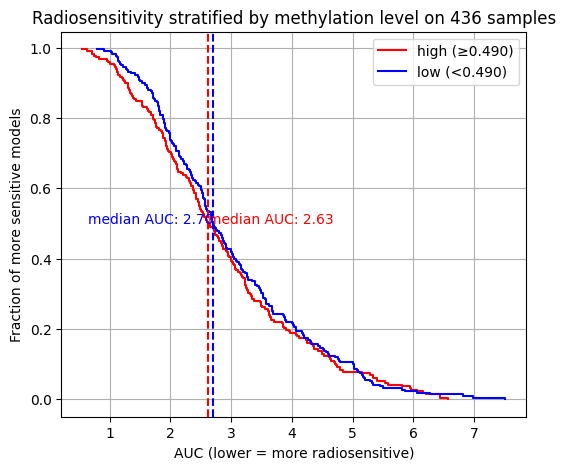

In [100]:
import numpy as np
import matplotlib.pyplot as plt

column_name = 'Primarysite'
column_val = 'central_nervous_system'

specific = merged[merged[column_name] == column_val]

# specific = specific[specific["Histology"] == "glioma"]

specific = merged

# Example arrays
auc = np.array(specific['auc'].values.ravel())

methylation = np.array(specific['mean_methylation'].values.ravel())

threshold = np.median(methylation)
group_high = methylation >= threshold
group_low = methylation < threshold

auc_high = auc[group_high]
auc_low = auc[group_low]

def pseudo_km_curve(auc_values):
    auc_sorted = np.sort(auc_values)
    surv_prob = 1 - np.arange(1, len(auc_sorted)+1) / len(auc_sorted)
    return auc_sorted, surv_prob

auc_h, surv_h = pseudo_km_curve(auc_high)
auc_l, surv_l = pseudo_km_curve(auc_low)

plt.figure(figsize=(6, 5))

plt.step(auc_h, surv_h, where="post", color="red", label="high (≥0.490)")
plt.step(auc_l, surv_l, where="post", color="blue", label="low (<0.490)")

# Annotate medians
median_h = np.median(auc_high)
median_l = np.median(auc_low)
plt.axvline(median_h, color="red", linestyle="--")
plt.axvline(median_l, color="blue", linestyle="--")
plt.text(median_h, 0.5, f"median AUC: {median_h:.2f}", color="red", ha="left")
plt.text(median_l, 0.5, f"median AUC: {median_l:.2f}", color="blue", ha="right")

plt.xlabel("AUC (lower = more radiosensitive)")
plt.ylabel("Fraction of more sensitive models")
plt.title(f"Radiosensitivity stratified by methylation level on {len(specific)} samples")
plt.legend()
plt.grid(True)
plt.show()


### Version with best threshold

Best threshold: 0.294, Score: 1.674
-1.6740418115007447


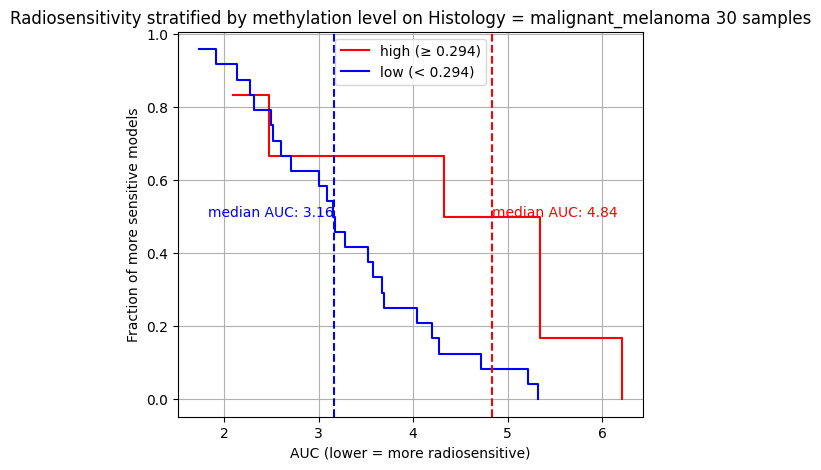

In [125]:

column_name = 'Histology'
column_val = 'malignant_melanoma'

specific = merged[merged[column_name] == column_val]

# specific = merged

# specific = specific[specific["Histology"] == "glioma"]

# Example arrays
auc = np.array(specific['auc'].values.ravel())

methylation = np.array(specific['mean_methylation'].values.ravel())

thresholds = np.linspace(methylation.min() + 1e-4, methylation.max() - 1e-4, 1000)
best_score = -np.inf
best_threshold = None
min_group_size = 0.2*len(auc)

for t in thresholds:
    group_high = methylation >= t
    group_low = methylation < t

    if group_high.sum() < min_group_size or group_low.sum() < min_group_size:
        continue

    auc_high = auc[group_high]
    auc_low = auc[group_low]

    score = np.abs(np.median(auc_low) - np.median(auc_high))  # Higher score = better separation

    if score > best_score:
        best_score = score
        best_threshold = t

print(f"Best threshold: {best_threshold:.3f}, Score: {best_score:.3f}")

group_high = methylation >= best_threshold
group_low = methylation < best_threshold

auc_high = auc[group_high]
auc_low = auc[group_low]

print( np.median(auc_low) - np.median(auc_high))

def pseudo_km_curve(auc_values):
    auc_sorted = np.sort(auc_values)
    surv_prob = 1 - np.arange(1, len(auc_sorted)+1) / len(auc_sorted)
    return auc_sorted, surv_prob

auc_h, surv_h = pseudo_km_curve(auc_high)
auc_l, surv_l = pseudo_km_curve(auc_low)

plt.figure(figsize=(6, 5))

plt.step(auc_h, surv_h, where="post", color="red" ,label=f"high (≥ {best_threshold:.3f})")
plt.step(auc_l, surv_l, where="post", color="blue", label=f"low (< {best_threshold:.3f})")

# Annotate medians
median_h = np.median(auc_high)
median_l = np.median(auc_low)
plt.axvline(median_h, color="red", linestyle="--")
plt.axvline(median_l, color="blue", linestyle="--")
plt.text(median_h, 0.5, f"median AUC: {median_h:.2f}", color="red", ha="left")
plt.text(median_l, 0.5, f"median AUC: {median_l:.2f}", color="blue", ha="right")

plt.xlabel("AUC (lower = more radiosensitive)")
plt.ylabel("Fraction of more sensitive models")
plt.title(f"Radiosensitivity stratified by methylation level on {column_name} = {column_val} {len(specific)} samples")
plt.legend()
plt.grid(True)
plt.show()
